In [96]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import seaborn as sns
plt.rcParams['figure.figsize'] = (18,9)
# Initialize the Panel Extensions (for Plotly)
pn.extension('plotly')


In [3]:
zip_list=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473,11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237,10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040 ,11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378, 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [4]:
bronx=[10453, 10457, 10460, 10458, 10467, 10468, 10451, 10452, 10456, 10454, 10455, 10459, 10474,10463, 10471, 10466, 10469, 10470, 10475,10461, 10462,10464, 10465, 10472, 10473]

brooklyn=[11212, 11213, 11216, 11233, 11238,11209, 11214, 11228,11204, 11218, 11219, 11230,11234, 11236, 11239, 11223, 11224, 11229, 11235,11201, 11205, 11215, 11217, 11231,11203, 11210, 11225, 11226,11207, 11208,11211, 11222,11220, 11232,11206, 11221, 11237]

manhattan=[ 10026, 10027, 10030, 10037, 10039, 10001, 10011, 10018, 10019, 10020, 10036,10029, 10035, 10010, 10016, 10017, 10022,10012, 10013, 10014,10004, 10005, 10006, 10007, 10038, 10280,10002, 10003, 10009,10021, 10028, 10044, 10065, 10075, 10128, 10023, 10024, 10025,10031, 10032, 10033, 10034, 10040]

queens=[11361, 11362, 11363, 11364,11354, 11355, 11356, 11357, 11358, 11359, 11360, 11365, 11366, 11367,11412, 11423, 11432, 11433, 11434, 11435, 11436,11101, 11102, 11103, 11104, 11105, 11106, 11374, 11375, 11379, 11385, 11691, 11692, 11693, 11694, 11695, 11697,11004, 11005, 11411, 11413, 11422, 11426, 11427, 11428, 11429,11414, 11415, 11416, 11417, 11418, 11419, 11420, 11421,11368, 11369, 11370, 11372, 11373, 11377, 11378]

staten_island=[ 10302, 10303, 10310,10306, 10307, 10308, 10309, 10312,10301, 10304, 10305, 10314]

In [7]:
nyc_sale_path=Path("data/NYC_data.csv")
colnames = ["sno","Zip Code", "Date", "Num of Units Sold", "Average Sales", "Median Sales"]

nyc_sale_df=pd.read_csv(nyc_sale_path, names=colnames, header=None)
nyc_sale_df.drop(columns=['sno','Num of Units Sold','Median Sales'],inplace=True)
for i in range (len(nyc_sale_df)):
    nyc_sale_df.iloc[i,0]=nyc_sale_df.iloc[i,0][2:]
nyc_sale_df['Borough']=pd.Series()
for i in range(len(nyc_sale_df)):
    if int(nyc_sale_df.iloc[i,0]) in bronx:
        nyc_sale_df.iloc[i,3]='Bronx'
    elif int(nyc_sale_df.iloc[i,0]) in brooklyn:
        nyc_sale_df.iloc[i,3]='Brooklyn'
    elif int(nyc_sale_df.iloc[i,0]) in manhattan:
        nyc_sale_df.iloc[i,3]='Manhattan'
    elif int(nyc_sale_df.iloc[i,0]) in queens:
         nyc_sale_df.iloc[i,3]='Queens'
    elif int(nyc_sale_df.iloc[i,0]) in staten_island:
         nyc_sale_df.iloc[i,3]='Staten Island'
nyc_sale_df['Date']=pd.to_datetime(nyc_sale_df['Date'])
nyc_sale_df.sort_values(by='Date',inplace=True) 


In [197]:
avg_sale_price_per_borough=nyc_sale_df.drop(columns='Zip Code')
avg_sale_price_per_borough=avg_sale_price_per_borough.pivot_table(index='Date',columns='Borough',values='Average Sales')

In [12]:
def plot_avg_sale_price_per_borough (borough):
    return(avg_sale_price_per_borough[borough].hvplot.line( rot=90,
                                                               label=f'Avg Sale Price In {borough}',
                                                               xlabel='Date',
                                                               ylabel="Price"
    ))
list_of_boroughs=['Manhattan','Bronx','Brooklyn','Queens','Staten Island']


In [15]:
rent_path=Path("data/Zip_Rent_2015.csv")
rent_df=pd.read_csv(rent_path)

rent_ny_df=rent_df[rent_df['City'] == "New York"]
#rent_ny_df.fillna(0,inplace=True)
rent_ny_df.reset_index(inplace=True)        
rent_ny_df.drop(columns=['RegionID','index','SizeRank','Metro','State','City','CountyName'],inplace=True)
rent_ny_df.rename(columns={"RegionName": "Zip_Code"},inplace=True) 
rent_ny_df['Borough']=pd.Series()
column_names_rent=list(rent_ny_df.columns.values)
rent_ny_df=rent_ny_df[['Zip_Code','Borough' , '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01']]

for i in range(len(rent_ny_df)):
    if rent_ny_df.iloc[i,0] in bronx:
        rent_ny_df.iloc[i,1]='Bronx'
    elif rent_ny_df.iloc[i,0] in brooklyn:
        rent_ny_df.iloc[i,1]='Brooklyn'
    elif rent_ny_df.iloc[i,0] in manhattan:
        rent_ny_df.iloc[i,1]='Manhattan'
    elif rent_ny_df.iloc[i,0] in queens:
         rent_ny_df.iloc[i,1]='Queens'
    elif rent_ny_df.iloc[i,0] in staten_island:
         rent_ny_df.iloc[i,1]='Staten Island'
    



C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\shake\anaconda3\envs\pyvizenv\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [213]:
avg_rent_price_per_borough=rent_ny_df.drop(columns='Zip_Code')
avg_rent_price_per_borough=avg_rent_price_per_borough.groupby('Borough').mean().transpose()
avg_rent_price_per_borough.hvplot(rot=90)

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [201]:
"""from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
def rent_per_borough():
    avg_rent_price_per_borough_1=rent_ny_df.drop(columns='Zip_Code')
    avg_rent_price_per_borough_1.set_index(avg_rent_price_per_borough_1['Borough'],inplace=True)
    avg_rent_price_per_borough_1.drop(columns='Borough',inplace=True)
    avg_rent_price_per_borough_1=avg_rent_price_per_borough_1.groupby('Borough').mean().transpose()
    fig_rent = Figure(figsize=(8, 4))
    FigureCanvas(fig_rent)
    fig_rent = avg_rent_price_per_borough_1.hvplot(rot=90)
    return fig_rent"""

"from matplotlib.figure import Figure\nfrom matplotlib.backends.backend_agg import FigureCanvas\ndef rent_per_borough():\n    avg_rent_price_per_borough_1=rent_ny_df.drop(columns='Zip_Code')\n    avg_rent_price_per_borough_1.set_index(avg_rent_price_per_borough_1['Borough'],inplace=True)\n    avg_rent_price_per_borough_1.drop(columns='Borough',inplace=True)\n    avg_rent_price_per_borough_1=avg_rent_price_per_borough_1.groupby('Borough').mean().transpose()\n    fig_rent = Figure(figsize=(8, 4))\n    FigureCanvas(fig_rent)\n    fig_rent = avg_rent_price_per_borough_1.hvplot(rot=90)\n    return fig_rent"

In [214]:
avg_rent_price_per_borough_inter=rent_ny_df.drop(columns='Zip_Code').groupby(['Borough']).mean()
def plot_avg_rent_price_per_borough (borough):
    return(avg_rent_price_per_borough_inter.loc[borough].hvplot.line( rot=90,
                                                               label=f'Avg Rent Price In {borough}',
                                                               xlabel='Date',
                                                               ylabel="Price"
    ))
interact(plot_avg_rent_price_per_borough,borough=list_of_boroughs)

Column
    [0] Column
        [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
    [1] Row
        [0] HoloViews(Curve, name='interactive100954')

In [183]:
quarter_rent_path=Path("data/quarter_rent_df.csv")
quarter_rent_df=pd.read_csv(quarter_rent_path, index_col=0)
quarter_sale_path=Path("data/quarter_sale_df.csv")
quarter_sale_df=pd.read_csv(quarter_sale_path, index_col=0)

In [184]:
def heat_map_rent():
    
    return sns.heatmap(quarter_rent_df.corr(), vmin=-1, vmax=1)
def heat_map_sale():
    fig, ax = plt.subplots(figsize=(14,9))
    sns.heatmap(quarter_sale_df.corr(), fmt="", cmap='RdYlGn', ax=ax)
    return fig
    #return sns.heatmap(quarter_sale_df.corr(), vmin=-1, vmax=1,cmap="YlGnBu")

In [167]:
def heat_maps():
    fig, axes = plt.subplots(ncols=2, figsize=(8, 4))

    ax1, ax2 = axes

    im1 = ax1.matshow(quarter_rent_df.corr(),cmap="YlGnBu")
    im2 = ax2.matshow(quarter_sale_df.corr(),cmap='coolwarm',)

    return pn.panel(fig.colorbar(im1, ax=ax1)),pn.panel(fig.colorbar(im2, ax=ax2))

(Str(Colorbar), Str(Colorbar))

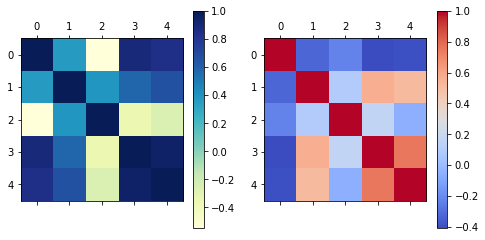

In [168]:
heat_maps()

In [181]:
def plot_sale_rent(borough):
    
    fig, ax1 = plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('Year-Quarter')
    ax1.set_ylabel('Sale Price', color=color)
    ax1.plot(quarter_sale_df.index, quarter_sale_df[borough], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Rent Price', color=color)  # we already handled the x-label with ax1
    ax2.plot(quarter_rent_df.index, quarter_rent_df[borough], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.title(f'{borough} Rent / Sales Price Correlation')
    return fig
  

Column
    [0] Column
        [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
    [1] Row
        [0] Matplotlib(Figure, name='interactive86350')
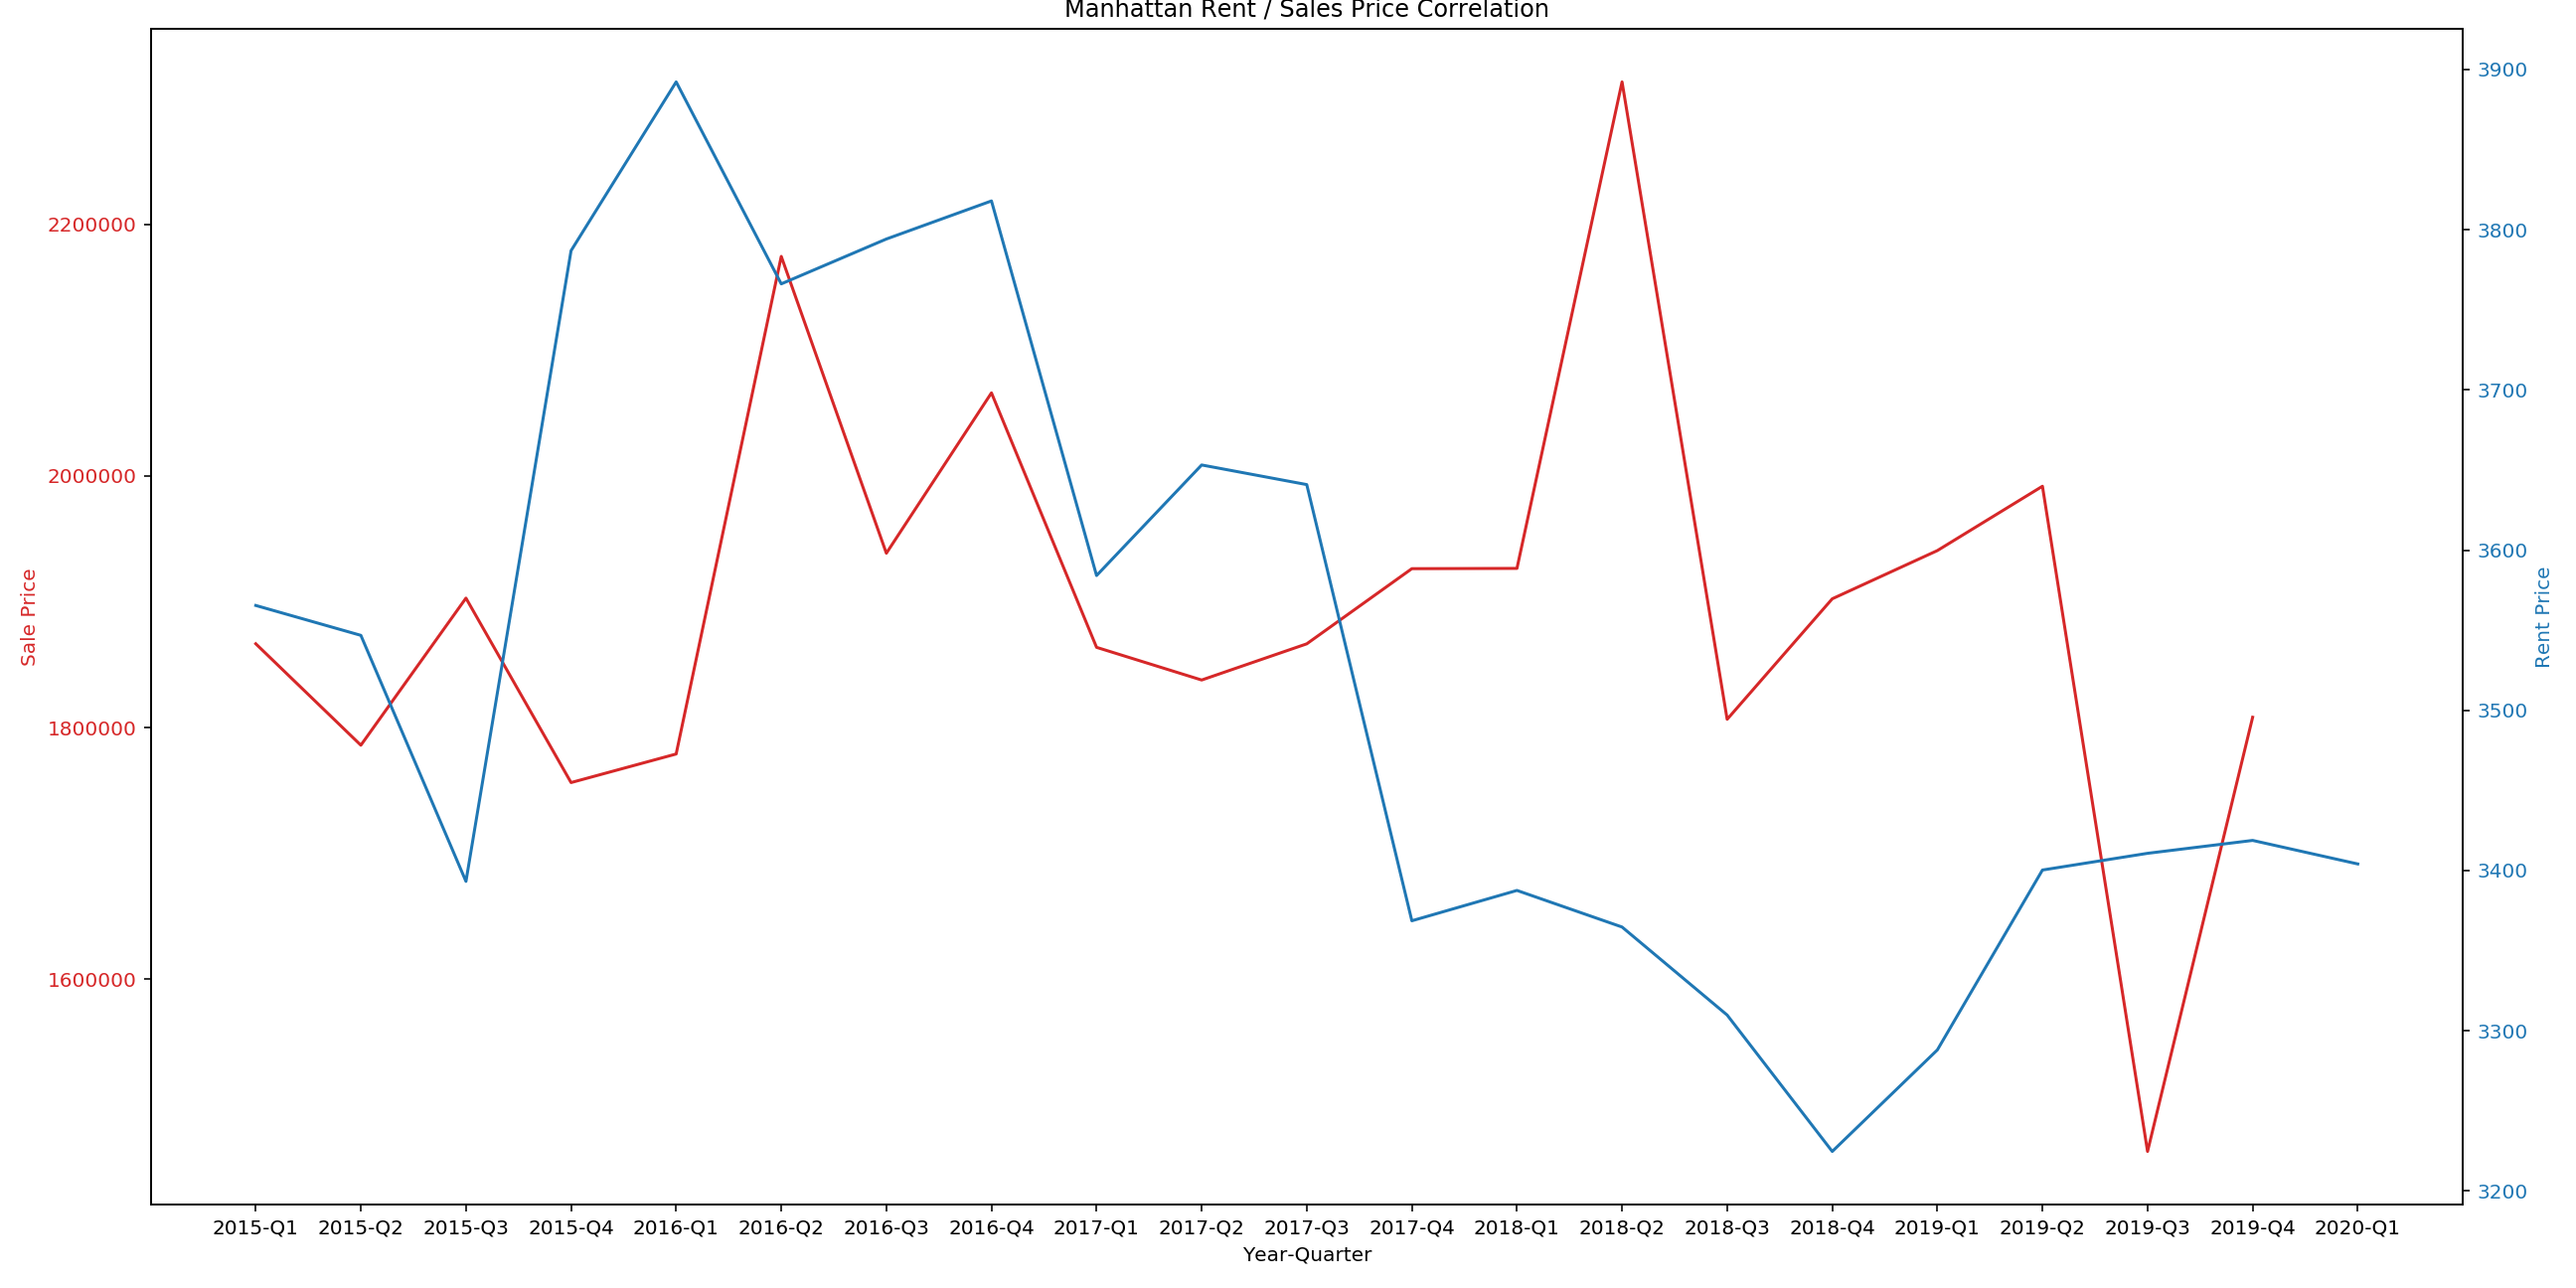

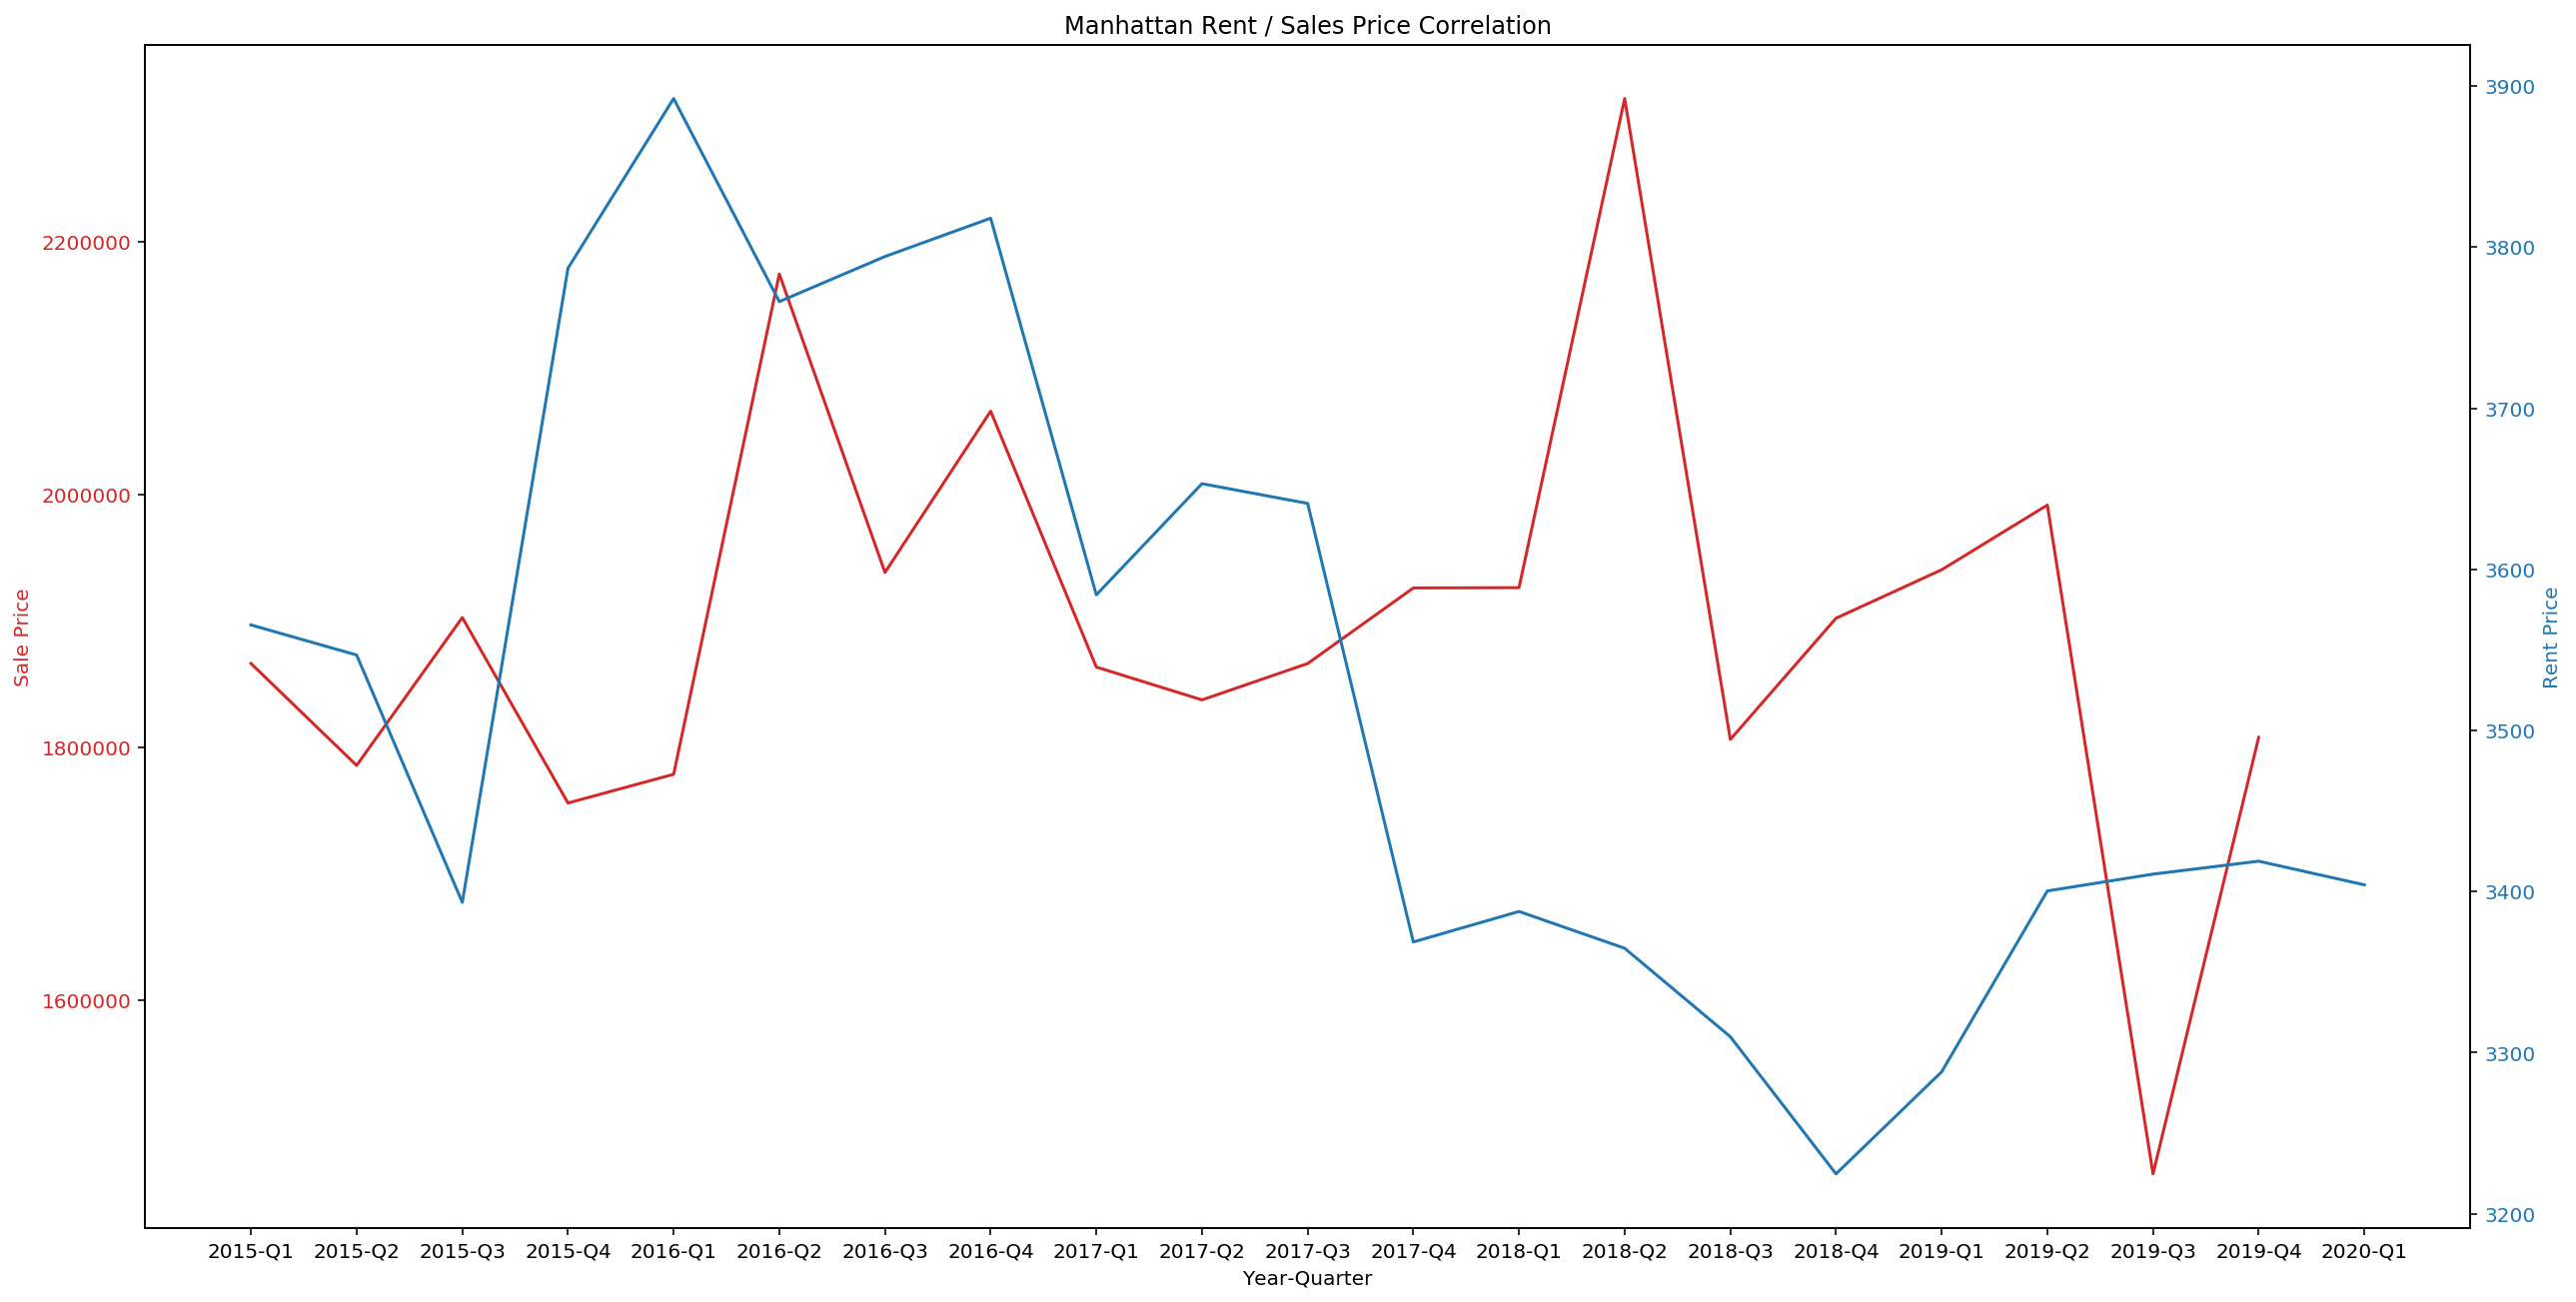

In [182]:
interact(plot_sale_rent,borough=list_of_boroughs) 

In [216]:
column_1=pn.Column(avg_sale_price_per_borough.hvplot(label='Avg Sale Price Per Borough'),avg_rent_price_per_borough.hvplot(label='Avg Rent Price Per Borough'))
column_2=pn.Column(interact(plot_avg_sale_price_per_borough,borough=list_of_boroughs),interact(plot_avg_rent_price_per_borough,borough=list_of_boroughs))

#column_3=pn.Column(heat_map_rent)
#row_4=pn.Row(interact(plot_sale_rent,borough=list_of_boroughs))

In [217]:
nyc_real_estate=pn.Tabs(("avg sale/rent price per borough",column_1),
                       ("interact",column_2))
                       #("Heat Maps",column_3),
                       #("Rent/Sale price corr",row_4))
nyc_real_estate

Tabs
    [0] Column
        [0] HoloViews(NdOverlay)
        [1] HoloViews(NdOverlay)
    [1] Column
        [0] Column
            [0] Column
                [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
            [1] Row
                [0] HoloViews(Curve, name='interactive102283')
        [1] Column
            [0] Column
                [0] Select(name='borough', options=['Manhattan', ...], value='Manhattan')
            [1] Row
                [0] HoloViews(Curve, name='interactive102352')